# Sentdex: Neural Networks and Deep Learning 6: Training CNN

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True 

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|▏                                                                             | 25/12501 [00:00<00:50, 246.60it/s]

PetImages/Cat


  0%|▏                                                                             | 38/12501 [00:00<00:33, 375.60it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:32<00:00, 385.02it/s]
C:\Users\aseem\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [5]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [6]:
print(len(training_data))

24946


In [7]:
print(training_data[1])

[array([[226, 203, 219, ...,  36,  30,  28],
        [223, 220, 183, ...,  73,  69,  63],
        [235, 221, 218, ...,  89,  90,  76],
        ...,
        [228, 230, 230, ...,  56,  48,  25],
        [224, 216, 221, ...,  51,  52,  74],
        [227, 227, 226, ...,  10,   7,   5]], dtype=uint8) array([0., 1.])]


<function matplotlib.pyplot.show(close=None, block=None)>

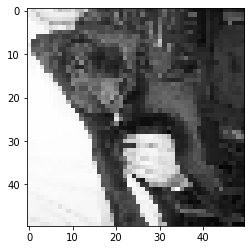

In [11]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show

In [9]:
training_data[1][1]

array([0., 1.])

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
net = Net()    

torch.Size([128, 2, 2])


In [20]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT =0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [22]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [33]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")    

  0%|▎                                                                                 | 1/225 [00:00<00:48,  4.63it/s]

torch.Size([128, 2, 2])


  1%|▋                                                                                 | 2/225 [00:00<00:47,  4.69it/s]

torch.Size([128, 2, 2])


  1%|█                                                                                 | 3/225 [00:00<00:47,  4.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▊                                                                                | 5/225 [00:01<00:46,  4.69it/s]

torch.Size([128, 2, 2])


  3%|██▏                                                                               | 6/225 [00:01<00:47,  4.57it/s]

torch.Size([128, 2, 2])


  3%|██▌                                                                               | 7/225 [00:01<00:48,  4.54it/s]

torch.Size([128, 2, 2])


  4%|██▉                                                                               | 8/225 [00:01<00:47,  4.55it/s]

torch.Size([128, 2, 2])


  4%|███▎                                                                              | 9/225 [00:01<00:47,  4.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|███▉                                                                             | 11/225 [00:02<00:45,  4.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▋                                                                            | 13/225 [00:02<00:47,  4.50it/s]

torch.Size([128, 2, 2])


  6%|█████                                                                            | 14/225 [00:03<00:47,  4.40it/s]

torch.Size([128, 2, 2])


  7%|█████▍                                                                           | 15/225 [00:03<00:48,  4.31it/s]

torch.Size([128, 2, 2])


  7%|█████▊                                                                           | 16/225 [00:03<00:49,  4.21it/s]

torch.Size([128, 2, 2])


  8%|██████                                                                           | 17/225 [00:03<00:48,  4.29it/s]

torch.Size([128, 2, 2])


  8%|██████▍                                                                          | 18/225 [00:04<00:48,  4.24it/s]

torch.Size([128, 2, 2])


  8%|██████▊                                                                          | 19/225 [00:04<00:48,  4.27it/s]

torch.Size([128, 2, 2])


  9%|███████▏                                                                         | 20/225 [00:04<00:47,  4.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|███████▉                                                                         | 22/225 [00:04<00:47,  4.31it/s]

torch.Size([128, 2, 2])


 10%|████████▎                                                                        | 23/225 [00:05<00:45,  4.42it/s]

torch.Size([128, 2, 2])


 11%|████████▋                                                                        | 24/225 [00:05<00:45,  4.45it/s]

torch.Size([128, 2, 2])


 11%|█████████                                                                        | 25/225 [00:05<00:44,  4.47it/s]

torch.Size([128, 2, 2])


 12%|█████████▎                                                                       | 26/225 [00:05<00:43,  4.55it/s]

torch.Size([128, 2, 2])


 12%|█████████▋                                                                       | 27/225 [00:06<00:43,  4.60it/s]

torch.Size([128, 2, 2])


 12%|██████████                                                                       | 28/225 [00:06<00:42,  4.64it/s]

torch.Size([128, 2, 2])


 13%|██████████▍                                                                      | 29/225 [00:06<00:42,  4.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▏                                                                     | 31/225 [00:06<00:40,  4.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▉                                                                     | 33/225 [00:07<00:40,  4.69it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▌                                                                    | 35/225 [00:07<00:39,  4.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|█████████████▎                                                                   | 37/225 [00:08<00:39,  4.78it/s]

torch.Size([128, 2, 2])


 17%|█████████████▋                                                                   | 38/225 [00:08<00:39,  4.76it/s]

torch.Size([128, 2, 2])


 17%|██████████████                                                                   | 39/225 [00:08<00:39,  4.69it/s]

torch.Size([128, 2, 2])


 18%|██████████████▍                                                                  | 40/225 [00:08<00:40,  4.57it/s]

torch.Size([128, 2, 2])


 18%|██████████████▊                                                                  | 41/225 [00:09<00:40,  4.56it/s]

torch.Size([128, 2, 2])


 19%|███████████████                                                                  | 42/225 [00:09<00:39,  4.61it/s]

torch.Size([128, 2, 2])


 19%|███████████████▍                                                                 | 43/225 [00:09<00:39,  4.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|████████████████▏                                                                | 45/225 [00:09<00:39,  4.59it/s]

torch.Size([128, 2, 2])


 20%|████████████████▌                                                                | 46/225 [00:10<00:38,  4.64it/s]

torch.Size([128, 2, 2])


 21%|████████████████▉                                                                | 47/225 [00:10<00:38,  4.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▋                                                               | 49/225 [00:10<00:37,  4.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████▎                                                              | 51/225 [00:11<00:36,  4.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████                                                              | 53/225 [00:11<00:36,  4.73it/s]

torch.Size([128, 2, 2])


 24%|███████████████████▍                                                             | 54/225 [00:11<00:36,  4.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 24%|███████████████████▊                                                             | 55/225 [00:12<00:35,  4.73it/s]


torch.Size([128, 2, 2])


 25%|████████████████████▌                                                            | 57/225 [00:12<00:36,  4.57it/s]

torch.Size([128, 2, 2])


 26%|████████████████████▉                                                            | 58/225 [00:12<00:37,  4.43it/s]

torch.Size([128, 2, 2])


 26%|█████████████████████▏                                                           | 59/225 [00:12<00:38,  4.28it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▌                                                           | 60/225 [00:13<00:37,  4.40it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▉                                                           | 61/225 [00:13<00:36,  4.49it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                          | 62/225 [00:13<00:36,  4.45it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▋                                                          | 63/225 [00:13<00:36,  4.40it/s]

torch.Size([128, 2, 2])


 28%|███████████████████████                                                          | 64/225 [00:14<00:36,  4.44it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▍                                                         | 65/225 [00:14<00:36,  4.40it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▊                                                         | 66/225 [00:14<00:35,  4.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|████████████████████████▍                                                        | 68/225 [00:14<00:34,  4.60it/s]

torch.Size([128, 2, 2])


 31%|████████████████████████▊                                                        | 69/225 [00:15<00:34,  4.56it/s]

torch.Size([128, 2, 2])


 31%|█████████████████████████▏                                                       | 70/225 [00:15<00:35,  4.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 32%|█████████████████████████▉                                                       | 72/225 [00:15<00:34,  4.39it/s]

torch.Size([128, 2, 2])


 32%|██████████████████████████▎                                                      | 73/225 [00:16<00:35,  4.31it/s]

torch.Size([128, 2, 2])


 33%|██████████████████████████▋                                                      | 74/225 [00:16<00:35,  4.26it/s]

torch.Size([128, 2, 2])


 33%|███████████████████████████                                                      | 75/225 [00:16<00:35,  4.17it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▎                                                     | 76/225 [00:16<00:35,  4.16it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▋                                                     | 77/225 [00:17<00:35,  4.15it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████                                                     | 78/225 [00:17<00:34,  4.26it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████▍                                                    | 79/225 [00:17<00:33,  4.33it/s]

torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                    | 80/225 [00:17<00:34,  4.22it/s]

torch.Size([128, 2, 2])


 36%|█████████████████████████████▏                                                   | 81/225 [00:17<00:33,  4.31it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 36%|█████████████████████████████▌                                                   | 82/225 [00:18<00:32,  4.43it/s]

 37%|█████████████████████████████▉                                                   | 83/225 [00:18<00:31,  4.47it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 38%|██████████████████████████████▌                                                  | 85/225 [00:18<00:30,  4.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|███████████████████████████████▎                                                 | 87/225 [00:19<00:30,  4.60it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▋                                                 | 88/225 [00:19<00:31,  4.39it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████                                                 | 89/225 [00:19<00:30,  4.43it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▍                                                | 90/225 [00:20<00:31,  4.28it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▊                                                | 91/225 [00:20<00:31,  4.24it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████                                                | 92/225 [00:20<00:31,  4.16it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████▍                                               | 93/225 [00:20<00:31,  4.15it/s]

torch.Size([128, 2, 2])


 42%|█████████████████████████████████▊                                               | 94/225 [00:20<00:30,  4.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|██████████████████████████████████▌                                              | 96/225 [00:21<00:29,  4.44it/s]

torch.Size([128, 2, 2])


 43%|██████████████████████████████████▉                                              | 97/225 [00:21<00:29,  4.30it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▎                                             | 98/225 [00:21<00:29,  4.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|███████████████████████████████████▌                                            | 100/225 [00:22<00:27,  4.55it/s]

torch.Size([128, 2, 2])


 45%|███████████████████████████████████▉                                            | 101/225 [00:22<00:26,  4.66it/s]

torch.Size([128, 2, 2])


 45%|████████████████████████████████████▎                                           | 102/225 [00:22<00:26,  4.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▉                                           | 104/225 [00:23<00:25,  4.66it/s]

torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▎                                          | 105/225 [00:23<00:25,  4.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████                                          | 107/225 [00:23<00:25,  4.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▊                                         | 109/225 [00:24<00:24,  4.70it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████                                         | 110/225 [00:24<00:24,  4.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▊                                        | 112/225 [00:24<00:24,  4.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|████████████████████████████████████████▏                                       | 113/225 [00:25<00:23,  4.71it/s]

torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▉                                       | 115/225 [00:25<00:24,  4.50it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▏                                      | 116/225 [00:25<00:24,  4.38it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▌                                      | 117/225 [00:26<00:24,  4.36it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▉                                      | 118/225 [00:26<00:24,  4.41it/s]

torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▎                                     | 119/225 [00:26<00:24,  4.34it/s]

torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▋                                     | 120/225 [00:26<00:23,  4.44it/s]

torch.Size([128, 2, 2])


 54%|███████████████████████████████████████████                                     | 121/225 [00:26<00:22,  4.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 54%|███████████████████████████████████████████▍                                    | 122/225 [00:27<00:22,  4.59it/s]

 55%|███████████████████████████████████████████▋                                    | 123/225 [00:27<00:22,  4.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▍                                   | 125/225 [00:27<00:21,  4.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|█████████████████████████████████████████████▏                                  | 127/225 [00:28<00:20,  4.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▊                                  | 129/225 [00:28<00:21,  4.51it/s]

torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▏                                 | 130/225 [00:28<00:21,  4.51it/s]

torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▌                                 | 131/225 [00:29<00:20,  4.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|███████████████████████████████████████████████▎                                | 133/225 [00:29<00:20,  4.47it/s]

torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▋                                | 134/225 [00:29<00:20,  4.50it/s]

torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████                                | 135/225 [00:29<00:20,  4.43it/s]

torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████▎                               | 136/225 [00:30<00:20,  4.29it/s]

torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▋                               | 137/225 [00:30<00:20,  4.35it/s]

torch.Size([128, 2, 2])


 61%|█████████████████████████████████████████████████                               | 138/225 [00:30<00:20,  4.28it/s]

torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▍                              | 139/225 [00:30<00:20,  4.29it/s]

torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▊                              | 140/225 [00:31<00:19,  4.36it/s]

torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████▏                             | 141/225 [00:31<00:19,  4.41it/s]

torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████▍                             | 142/225 [00:31<00:18,  4.38it/s]

torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▊                             | 143/225 [00:31<00:18,  4.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▌                            | 145/225 [00:32<00:17,  4.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|████████████████████████████████████████████████████▎                           | 147/225 [00:32<00:17,  4.44it/s]

torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▌                           | 148/225 [00:32<00:17,  4.46it/s]

torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▉                           | 149/225 [00:33<00:16,  4.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|█████████████████████████████████████████████████████▋                          | 151/225 [00:33<00:16,  4.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 68%|██████████████████████████████████████████████████████                          | 152/225 [00:33<00:15,  4.57it/s]

 68%|██████████████████████████████████████████████████████▍                         | 153/225 [00:33<00:15,  4.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|███████████████████████████████████████████████████████                         | 155/225 [00:34<00:14,  4.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|███████████████████████████████████████████████████████▊                        | 157/225 [00:34<00:14,  4.71it/s]

torch.Size([128, 2, 2])


 70%|████████████████████████████████████████████████████████▏                       | 158/225 [00:35<00:14,  4.58it/s]

torch.Size([128, 2, 2])


 71%|████████████████████████████████████████████████████████▌                       | 159/225 [00:35<00:14,  4.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▏                      | 161/225 [00:35<00:13,  4.65it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▌                      | 162/225 [00:35<00:14,  4.41it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▉                      | 163/225 [00:36<00:14,  4.27it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▎                     | 164/225 [00:36<00:14,  4.18it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▋                     | 165/225 [00:36<00:14,  4.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████▍                    | 167/225 [00:37<00:14,  4.02it/s]

torch.Size([128, 2, 2])


 75%|███████████████████████████████████████████████████████████▋                    | 168/225 [00:37<00:14,  3.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 75%|████████████████████████████████████████████████████████████                    | 169/225 [00:37<00:15,  3.61it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▊                   | 171/225 [00:38<00:16,  3.35it/s]

torch.Size([128, 2, 2])


 76%|█████████████████████████████████████████████████████████████▏                  | 172/225 [00:38<00:15,  3.44it/s]

torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▌                  | 173/225 [00:38<00:14,  3.63it/s]

torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▊                  | 174/225 [00:39<00:13,  3.92it/s]

torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▏                 | 175/225 [00:39<00:12,  4.08it/s]

torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▌                 | 176/225 [00:39<00:12,  3.92it/s]

torch.Size([128, 2, 2])


 79%|██████████████████████████████████████████████████████████████▉                 | 177/225 [00:39<00:12,  3.87it/s]

torch.Size([128, 2, 2])


 79%|███████████████████████████████████████████████████████████████▎                | 178/225 [00:40<00:12,  3.80it/s]

torch.Size([128, 2, 2])


 80%|███████████████████████████████████████████████████████████████▋                | 179/225 [00:40<00:11,  4.04it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████                | 180/225 [00:40<00:10,  4.22it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████▎               | 181/225 [00:40<00:10,  4.07it/s]

torch.Size([128, 2, 2])


 81%|████████████████████████████████████████████████████████████████▋               | 182/225 [00:41<00:10,  3.93it/s]

torch.Size([128, 2, 2])


 81%|█████████████████████████████████████████████████████████████████               | 183/225 [00:41<00:10,  3.96it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▍              | 184/225 [00:41<00:10,  3.95it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▊              | 185/225 [00:41<00:09,  4.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▍             | 187/225 [00:42<00:09,  3.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▏            | 189/225 [00:42<00:09,  3.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▌            | 190/225 [00:43<00:11,  2.92it/s]

torch.Size([128, 2, 2])


 85%|████████████████████████████████████████████████████████████████████▎           | 192/225 [00:44<00:12,  2.70it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▌           | 193/225 [00:44<00:10,  2.94it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▉           | 194/225 [00:44<00:10,  3.06it/s]

torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▎          | 195/225 [00:45<00:09,  3.26it/s]

torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▋          | 196/225 [00:45<00:08,  3.49it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████          | 197/225 [00:45<00:07,  3.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 88%|██████████████████████████████████████████████████████████████████████▍         | 198/225 [00:45<00:06,  3.98it/s]

 88%|██████████████████████████████████████████████████████████████████████▊         | 199/225 [00:46<00:06,  4.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████▍        | 201/225 [00:46<00:05,  4.51it/s]

torch.Size([128, 2, 2])


 90%|███████████████████████████████████████████████████████████████████████▊        | 202/225 [00:46<00:05,  4.58it/s]

torch.Size([128, 2, 2])


 90%|████████████████████████████████████████████████████████████████████████▏       | 203/225 [00:46<00:04,  4.50it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▌       | 204/225 [00:47<00:04,  4.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▏      | 206/225 [00:47<00:04,  4.59it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▌      | 207/225 [00:47<00:04,  4.46it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▉      | 208/225 [00:48<00:04,  4.05it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▎     | 209/225 [00:48<00:03,  4.23it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▋     | 210/225 [00:48<00:03,  4.27it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████     | 211/225 [00:48<00:03,  4.38it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████▍    | 212/225 [00:48<00:02,  4.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 95%|███████████████████████████████████████████████████████████████████████████▋    | 213/225 [00:49<00:02,  4.52it/s]

 95%|████████████████████████████████████████████████████████████████████████████    | 214/225 [00:49<00:02,  4.64it/s]

torch.Size([128, 2, 2])


 96%|████████████████████████████████████████████████████████████████████████████▍   | 215/225 [00:49<00:02,  4.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 217/225 [00:50<00:01,  4.61it/s]

torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 218/225 [00:50<00:01,  4.68it/s]

torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 219/225 [00:50<00:01,  4.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 221/225 [00:50<00:00,  4.56it/s]

torch.Size([128, 2, 2])


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 222/225 [00:51<00:00,  4.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|███████████████████████████████████████████████████████████████████████████████▋| 224/225 [00:51<00:00,  4.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:51<00:00,  4.36it/s]


Epoch: 0. Loss: 0.16688376665115356


* Though it says 1 EPOCH, the cell was run several times, and accuracy has improved over time. It as .573 at EPOCH 1.

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

  2%|█▍                                                                             | 44/2494 [00:00<00:05, 438.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  6%|████▋                                                                         | 149/2494 [00:00<00:04, 496.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 10%|███████▊                                                                      | 251/2494 [00:00<00:04, 499.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 14%|███████████                                                                   | 353/2494 [00:00<00:04, 503.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 18%|██████████████▏                                                               | 454/2494 [00:00<00:04, 480.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 20%|███████████████▋                                                              | 503/2494 [00:01<00:04, 479.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 24%|██████████████████▊                                                           | 602/2494 [00:01<00:03, 485.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 28%|█████████████████████▊                                                        | 699/2494 [00:01<00:03, 473.53it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 32%|████████████████████████▊                                                     | 794/2494 [00:01<00:03, 462.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 36%|███████████████████████████▊                                                  | 891/2494 [00:01<00:03, 474.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 38%|█████████████████████████████▍                                                | 942/2494 [00:01<00:03, 483.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 42%|████████████████████████████████▎                                            | 1045/2494 [00:02<00:03, 482.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 46%|███████████████████████████████████▎                                         | 1143/2494 [00:02<00:02, 484.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 50%|██████████████████████████████████████▍                                      | 1244/2494 [00:02<00:02, 484.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 54%|█████████████████████████████████████████▋                                   | 1350/2494 [00:02<00:02, 508.05it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 58%|████████████████████████████████████████████▊                                | 1452/2494 [00:02<00:02, 507.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 60%|██████████████████████████████████████████████▍                              | 1503/2494 [00:03<00:02, 492.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 64%|█████████████████████████████████████████████████▌                           | 1605/2494 [00:03<00:01, 501.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 69%|████████████████████████████████████████████████████▊                        | 1710/2494 [00:03<00:01, 513.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 73%|████████████████████████████████████████████████████████                     | 1817/2494 [00:03<00:01, 523.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 77%|███████████████████████████████████████████████████████████▍                 | 1925/2494 [00:03<00:01, 531.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 82%|██████████████████████████████████████████████████████████████▊              | 2033/2494 [00:04<00:00, 534.35it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 84%|████████████████████████████████████████████████████████████████▍            | 2087/2494 [00:04<00:00, 493.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 88%|███████████████████████████████████████████████████████████████████▋         | 2191/2494 [00:04<00:00, 494.16it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 92%|██████████████████████████████████████████████████████████████████████▊      | 2294/2494 [00:04<00:00, 502.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 96%|█████████████████████████████████████████████████████████████████████████▉   | 2394/2494 [00:04<00:00, 481.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 98%|███████████████████████████████████████████████████████████████████████████▍ | 2443/2494 [00:04<00:00, 480.43it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

100%|█████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:05<00:00, 492.81it/s]

torch.Size([128, 2, 2])
Accuracy:  0.742
